#**Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Vamos a construir un modelo de regresión para inhibidores de la acetilcolinesterasa .

#**Importamos las librerías**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#**Cargamos el dataset**

In [ ]:
df = pd.read_csv('bioactivity_data_2class_pIC50_pubchem_fp_acethylcolinesterase.csv')

#**Variables descriptoras**

Hasta ahora, tenemos como variables descriptoras los PaDEL Fingerprints que, en esencia, representan la ausencia o presencia de determinados grupos funcionales.

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6215,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6216,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6217,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6218,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#**Variable respuesta**

In [ ]:
Y = df.pIC50
Y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
6215,4.233810
6216,4.337242
6217,4.416688
6218,5.000000


#**Examinamos las dimensiones**

In [ ]:
X.shape

(6220, 881)

In [ ]:
Y.shape

(6220,)

#**Eliminamos las variables con poca varianza**

Es decir, vamos a quedarnos únicamente con aquellas FingerPrints que no sean casi exclusivamente 1 o 0.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

#**Separamos los datos en Train y Test (80/20)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((4976, 137), (4976,))

In [ ]:
X_test.shape, Y_test.shape

((1244, 137), (1244,))

#**Construimos el modelo Random Forest**

Usamos Random Forest ya que maneja bien la presencia de multitud de variables binarias y es robusto en cuanto a ruido y redundancia.

In [ ]:
import numpy as np
np.random.seed(100)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5484702598490726

In [ ]:
Y_pred = model.predict(X_test)

#**Scatter plot de Datos Experimentales vs Predichos**

<function matplotlib.pyplot.show(close=None, block=None)>

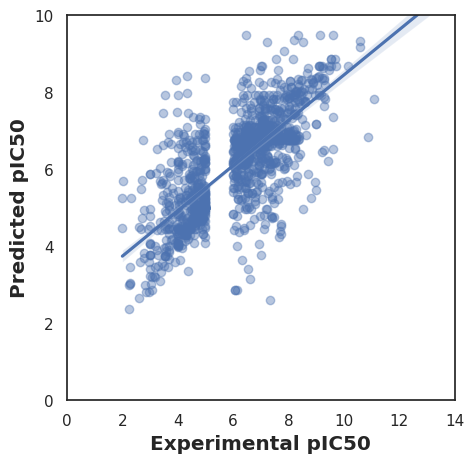

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 14)
ax.set_ylim(0, 10)
ax.figure.set_size_inches(5, 5)
plt.show

Parece que hay cierto sesgo, faltando valores de pIC50 de entre 5 y 6, es decir, falta de valores de IC50 de entre 5000 y 9999 nM. A pesar de ello, los puntos parecen seguir la diagonal, lo que indica cierto grado de precisión en las predicciones. Obtuvimos un R2 de 0.55. Es posible que este ses se haya producido porque decidimos eliminar las moléculas con actividad intermedia.

Vamos a realizar el mismo proceso pero con el archivo con las 3 clases.

In [ ]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X1 = df.drop('pIC50', axis=1)
X1

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y1 = df.pIC50
Y1

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
4690,5.612610
4691,5.595166
4692,5.419075
4693,5.460924


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X1 = selection.fit_transform(X1)

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2)

In [ ]:
import numpy as np
np.random.seed(100)

model1 = RandomForestRegressor(n_estimators=100)
model1.fit(X1_train, Y1_train)
r2_1 = model1.score(X1_test, Y1_test)
r2_1

0.5459934188267862

In [ ]:
Y1_pred = model1.predict(X1_test)

<function matplotlib.pyplot.show(close=None, block=None)>

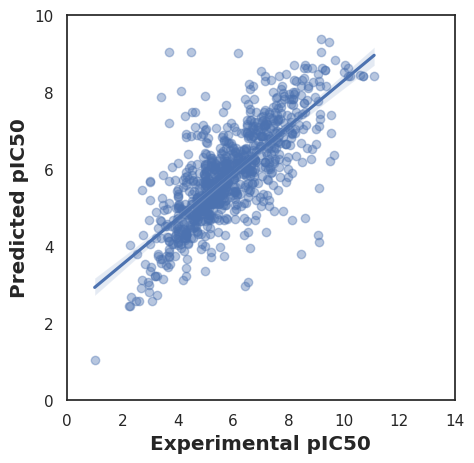

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y1_test, y=Y1_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 14)
ax.set_ylim(0, 10)
ax.figure.set_size_inches(5, 5)
plt.show

Vemos que ya no aparece ese sesgo.